In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [78]:
import numpy as np
import pandas as pd
import seaborn as sns

In [79]:
df=pd.read_csv('/kaggle/input/data-science-job-salaries/ds_salaries.csv')

In [80]:
df.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [81]:
df.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [82]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [83]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [84]:
categories=['experience_level', 'employment_type', 'company_location','job_title','employee_residence',
       'company_size','salary_currency']

In [192]:
df['salary']=np.log(df['salary'].values)


In [193]:
x=df.drop(['salary','Unnamed: 0'],axis=1)
y=df['salary']

In [194]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [195]:
x_train

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
9,2020,SE,FT,Lead Data Engineer,USD,125000,NZ,50,NZ,S
227,2021,MI,FT,Data Scientist,EUR,88654,DE,50,DE,L
591,2022,SE,FT,Data Architect,USD,144854,US,100,US,M
516,2022,SE,FT,Data Science Manager,USD,152500,US,100,US,M
132,2021,MI,FT,Applied Machine Learning Scientist,USD,38400,VN,100,US,M
...,...,...,...,...,...,...,...,...,...,...
71,2020,MI,FT,Data Scientist,EUR,42197,FR,50,FR,S
106,2021,MI,FT,Research Scientist,CAD,187442,CA,100,CA,L
270,2021,EN,FT,Data Engineer,USD,72500,US,100,US,L
435,2022,MI,FT,Data Engineer,GBP,91614,GB,100,GB,M


In [196]:
x_test

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
563,2022,SE,FT,Data Engineer,USD,140250,US,100,US,M
289,2022,SE,FT,Data Engineer,USD,135000,US,100,US,M
76,2021,MI,FT,BI Data Analyst,USD,100000,US,100,US,M
78,2021,MI,CT,ML Engineer,USD,270000,US,100,US,L
182,2021,MI,FT,Data Engineer,EUR,26005,RO,0,US,L
...,...,...,...,...,...,...,...,...,...,...
249,2021,SE,FT,Principal Data Analyst,USD,170000,US,100,US,M
365,2022,SE,FT,Data Scientist,USD,138600,US,100,US,M
453,2022,MI,FT,Machine Learning Engineer,USD,120000,US,100,US,S
548,2022,SE,FT,Data Analyst,USD,99050,US,100,US,M


In [197]:
x_train['salary_currency'].unique()

array(['USD', 'EUR', 'GBP', 'INR', 'AUD', 'BRL', 'HUF', 'PLN', 'CAD',
       'TRY', 'JPY', 'SGD', 'MXN', 'DKK', 'CNY'], dtype=object)

In [198]:
x_test['salary_currency'].unique() #convert these to sets and use substraction

array(['USD', 'EUR', 'INR', 'GBP', 'JPY', 'CAD', 'MXN', 'CHF', 'CLP',
       'TRY'], dtype=object)

In [199]:

y_train

9      11.736069
227    11.225243
591    11.883482
516    11.934920
132    10.555813
         ...    
71     10.518673
106    12.367341
270    11.191342
435    11.156251
102    16.213406
Name: salary, Length: 485, dtype: float64

In [200]:
y_test

563    11.851182
289    11.813030
76     11.512925
78     12.506177
182     9.998798
         ...    
249    12.043554
365    11.839347
453    11.695247
548    11.503380
235    11.608236
Name: salary, Length: 122, dtype: float64

In [93]:
'''
train_currency_set = set(x_train['salary_currency'].unique())
test_currency_set = set(x_test['salary_currency'].unique())

# the difference between the sets
difference = test_currency_set - train_currency_set
x_train_filtered = x_train[~x_train['salary_currency'].isin(difference)]
x_test_filtered = x_test[~x_test['salary_currency'].isin(difference)]
print(x_train_filtered['salary_currency'].unique())
print(x_test_filtered['salary_currency'].unique())
'''

"\ntrain_currency_set = set(x_train['salary_currency'].unique())\ntest_currency_set = set(x_test['salary_currency'].unique())\n\n# the difference between the sets\ndifference = test_currency_set - train_currency_set\nx_train_filtered = x_train[~x_train['salary_currency'].isin(difference)]\nx_test_filtered = x_test[~x_test['salary_currency'].isin(difference)]\nprint(x_train_filtered['salary_currency'].unique())\nprint(x_test_filtered['salary_currency'].unique())\n"

In [201]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Combine the unique values from both x_train and x_test
unique_values = list(set(x_train['salary_currency'].unique()) | set(x_test['salary_currency'].unique()))

# Fit the LabelEncoder on the combined unique values
label_encoder.fit(unique_values)

# Transform 'salary_currency' in both x_train and x_test using the fitted label encoder
x_train['salary_currency'] = label_encoder.transform(x_train['salary_currency'])
x_test['salary_currency'] = label_encoder.transform(x_test['salary_currency'])

In [202]:
x_train['salary_currency']

9      16
227     7
591    16
516    16
132    16
       ..
71      7
106     2
270    16
435     8
102     9
Name: salary_currency, Length: 485, dtype: int64

In [203]:
x_test['salary_currency']

563    16
289    16
76     16
78     16
182     7
       ..
249    16
365    16
453    16
548    16
235    16
Name: salary_currency, Length: 122, dtype: int64

In [204]:
y_train


9      11.736069
227    11.225243
591    11.883482
516    11.934920
132    10.555813
         ...    
71     10.518673
106    12.367341
270    11.191342
435    11.156251
102    16.213406
Name: salary, Length: 485, dtype: float64

In [205]:
x_train['experience_level'].unique()

array(['SE', 'MI', 'EX', 'EN'], dtype=object)

In [206]:
x_test['experience_level'].unique()

array(['SE', 'MI', 'EN', 'EX'], dtype=object)

In [207]:
unique_values = list(set(x_train['experience_level'].unique()) | set(x_test['experience_level'].unique()))

# Fit the LabelEncoder on the combined unique values
label_encoder.fit(unique_values)

# Transform 'salary_currency' in both x_train and x_test using the fitted label encoder
x_train['experience_level'] = label_encoder.transform(x_train['experience_level'])
x_test['experience_level'] = label_encoder.transform(x_test['experience_level'])

In [208]:
x_train['company_location'].unique()

array(['NZ', 'DE', 'US', 'GB', 'PL', 'FR', 'IN', 'PK', 'UA', 'AU', 'GR',
       'CA', 'NG', 'EE', 'CZ', 'BE', 'ES', 'AT', 'BR', 'DZ', 'IR', 'NL',
       'HU', 'PT', 'TR', 'JP', 'HN', 'MT', 'AE', 'LU', 'RO', 'SG', 'CH',
       'MY', 'MX', 'IT', 'HR', 'IL', 'DK', 'RU', 'CO', 'IQ', 'CN'],
      dtype=object)

In [209]:

x_test['company_location'].unique()

array(['US', 'FR', 'GR', 'LU', 'SI', 'DE', 'IN', 'GB', 'PK', 'MD', 'JP',
       'CA', 'AS', 'IE', 'AE', 'MX', 'VN', 'BE', 'KE', 'ES', 'CH', 'CL',
       'CN', 'DK', 'TR'], dtype=object)

In [210]:
unique_values = list(set(x_train['company_location'].unique()) | set(x_test['company_location'].unique()))

# Fit the LabelEncoder on the combined unique values
label_encoder.fit(unique_values)

# Transform 'salary_currency' in both x_train and x_test using the fitted label encoder
x_train['company_location'] = label_encoder.transform(x_train['company_location'])
x_test['company_location'] = label_encoder.transform(x_test['company_location'])

In [211]:
x_train['company_location']

9      38
227    12
591    48
516    48
132    48
       ..
71     17
106     6
270    48
435    18
102    48
Name: company_location, Length: 485, dtype: int64

In [212]:
x_test['company_location']

563    48
289    48
76     48
78     48
182    48
       ..
249    48
365    48
453    48
548    48
235    48
Name: company_location, Length: 122, dtype: int64

In [213]:
y_test


563    11.851182
289    11.813030
76     11.512925
78     12.506177
182     9.998798
         ...    
249    12.043554
365    11.839347
453    11.695247
548    11.503380
235    11.608236
Name: salary, Length: 122, dtype: float64

In [214]:
x_train['employment_type'].unique()

array(['FT', 'FL', 'PT', 'CT'], dtype=object)

In [215]:
x_test['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [216]:



unique_values = list(set(x_train['employment_type'].unique()) | set(x_test['employment_type'].unique()))

# Fit the LabelEncoder on the combined unique values
label_encoder.fit(unique_values)

# Transform 'salary_currency' in both x_train and x_test using the fitted label encoder
x_train['employment_type'] = label_encoder.transform(x_train['employment_type'])
x_test['employment_type'] = label_encoder.transform(x_test['employment_type'])

In [110]:
'''
train_currency_set = set(x_train['company_location'].unique())
test_currency_set = set(x_test['company_location'].unique())
difference = test_currency_set - train_currency_set
print (difference)
x_train_filtered = x_train_filtered[~x_train['company_location'].isin(difference)]
x_test_filtered = x_test_filtered[~x_test['company_location'].isin(difference)]
print(x_train_filtered['company_location'].unique())
print(x_test_filtered['company_location'].unique())
'''

"\ntrain_currency_set = set(x_train['company_location'].unique())\ntest_currency_set = set(x_test['company_location'].unique())\ndifference = test_currency_set - train_currency_set\nprint (difference)\nx_train_filtered = x_train_filtered[~x_train['company_location'].isin(difference)]\nx_test_filtered = x_test_filtered[~x_test['company_location'].isin(difference)]\nprint(x_train_filtered['company_location'].unique())\nprint(x_test_filtered['company_location'].unique())\n"

In [217]:
x_train['employee_residence'].unique()

array(['NZ', 'DE', 'US', 'VN', 'GB', 'IT', 'FR', 'IN', 'PK', 'UA', 'AU',
       'GR', 'CA', 'NG', 'BG', 'HK', 'EE', 'CZ', 'RU', 'PR', 'BE', 'ES',
       'AT', 'BR', 'DZ', 'IR', 'NL', 'RS', 'HU', 'PT', 'PL', 'TR', 'JP',
       'HN', 'MY', 'BO', 'MT', 'AE', 'LU', 'SG', 'AR', 'MX', 'TN', 'HR',
       'PH', 'DK', 'CO', 'IQ', 'CN'], dtype=object)

In [218]:
x_test['employee_residence'].unique()

array(['US', 'RO', 'FR', 'GR', 'SI', 'DE', 'IN', 'GB', 'PK', 'MD', 'JP',
       'CA', 'PT', 'IE', 'AE', 'IT', 'MX', 'VN', 'BE', 'KE', 'ES', 'CH',
       'CL', 'JE', 'TR'], dtype=object)

In [219]:
'''
train_currency_set = set(x_train['employee_residence'].unique())
test_currency_set = set(x_test['employee_residence'].unique())
difference = test_currency_set - train_currency_set
x_train_filtered = x_train_filtered[~x_train['employee_residence'].isin(difference)]
x_test_filtered = x_test_filtered[~x_test['employee_residence'].isin(difference)]
print(x_train_filtered['employee_residence'].unique())
print(x_test_filtered['employee_residence'].unique())
'''

"\ntrain_currency_set = set(x_train['employee_residence'].unique())\ntest_currency_set = set(x_test['employee_residence'].unique())\ndifference = test_currency_set - train_currency_set\nx_train_filtered = x_train_filtered[~x_train['employee_residence'].isin(difference)]\nx_test_filtered = x_test_filtered[~x_test['employee_residence'].isin(difference)]\nprint(x_train_filtered['employee_residence'].unique())\nprint(x_test_filtered['employee_residence'].unique())\n"

In [220]:
unique_values = list(set(x_train['employee_residence'].unique()) | set(x_test['employee_residence'].unique()))

# Fit the LabelEncoder on the combined unique values
label_encoder.fit(unique_values)

# Transform 'salary_currency' in both x_train and x_test using the fitted label encoder
x_train['employee_residence'] = label_encoder.transform(x_train['employee_residence'])
x_test['employee_residence'] = label_encoder.transform(x_test['employee_residence'])

In [221]:
x_train['job_title'].unique()

array(['Lead Data Engineer', 'Data Scientist', 'Data Architect',
       'Data Science Manager', 'Applied Machine Learning Scientist',
       'Data Engineer', 'Director of Data Science', 'Data Analyst',
       'Lead Data Analyst', 'Data Science Engineer', 'Research Scientist',
       'Data Science Consultant', 'Head of Data',
       'Applied Data Scientist', 'Analytics Engineer',
       'Principal Data Scientist', 'Computer Vision Engineer',
       'AI Scientist', 'Machine Learning Engineer', 'Cloud Data Engineer',
       'Lead Machine Learning Engineer', 'ML Engineer',
       'Machine Learning Infrastructure Engineer',
       'Machine Learning Scientist', 'Big Data Engineer',
       'BI Data Analyst', 'Data Analytics Manager', 'Big Data Architect',
       'Product Data Analyst', 'Data Engineering Manager',
       'Business Data Analyst', 'Director of Data Engineering',
       'Data Analytics Lead', 'Financial Data Analyst',
       'Finance Data Analyst', 'Head of Data Science',
       

In [222]:
x_test['job_title'].unique()

array(['Data Engineer', 'BI Data Analyst', 'ML Engineer',
       'Machine Learning Scientist', 'Data Scientist', 'Data Analyst',
       'Machine Learning Engineer', 'Principal Data Scientist',
       'Data Engineering Manager', 'Data Analytics Manager',
       'Big Data Engineer', 'Research Scientist',
       'Machine Learning Developer', 'Computer Vision Engineer',
       'AI Scientist', 'Machine Learning Manager', 'Lead Data Scientist',
       'Director of Data Science', '3D Computer Vision Researcher',
       'Data Specialist', 'Applied Data Scientist',
       'Data Science Engineer', 'Head of Data', 'Analytics Engineer',
       'ETL Developer', 'Marketing Data Analyst', 'Data Architect',
       'Data Science Consultant', 'Principal Data Analyst',
       'Head of Data Science'], dtype=object)

In [223]:
unique_values = list(set(x_train['job_title'].unique()) | set(x_test['job_title'].unique()))

# Fit the LabelEncoder on the combined unique values
label_encoder.fit(unique_values)

# Transform 'salary_currency' in both x_train and x_test using the fitted label encoder
x_train['job_title'] = label_encoder.transform(x_train['job_title'])
x_test['job_title'] = label_encoder.transform(x_test['job_title'])

In [224]:
'''
train_currency_set = set(x_train['job_title'].unique())
test_currency_set = set(x_test['job_title'].unique())
difference = test_currency_set - train_currency_set
x_train_filtered = x_train_filtered[~x_train['job_title'].isin(difference)]
x_test_filtered = x_test_filtered[~x_test['job_title'].isin(difference)]
print(x_train_filtered['job_title'].unique())
print(x_test_filtered['job_title'].unique())
'''

"\ntrain_currency_set = set(x_train['job_title'].unique())\ntest_currency_set = set(x_test['job_title'].unique())\ndifference = test_currency_set - train_currency_set\nx_train_filtered = x_train_filtered[~x_train['job_title'].isin(difference)]\nx_test_filtered = x_test_filtered[~x_test['job_title'].isin(difference)]\nprint(x_train_filtered['job_title'].unique())\nprint(x_test_filtered['job_title'].unique())\n"

In [225]:

x_train['company_size'].unique()

array(['S', 'L', 'M'], dtype=object)

In [226]:
x_test['company_size'].unique()

array(['M', 'L', 'S'], dtype=object)

In [227]:
unique_values = list(set(x_train['company_size'].unique()) | set(x_test['company_size'].unique()))

# Fit the LabelEncoder on the combined unique values
label_encoder.fit(unique_values)

# Transform 'salary_currency' in both x_train and x_test using the fitted label encoder
x_train['company_size'] = label_encoder.transform(x_train['company_size'])
x_test['company_size'] = label_encoder.transform(x_test['company_size'])

In [228]:
# from sklearn.preprocessing import LabelEncoder
# l=LabelEncoder()
# for i in categories:
#     print(i)
#     x_train[i]=l.fit_transform(x_train[i])
#     x_train[i]=l.transform(x_train[i])

In [229]:
x_train

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
9,2020,3,2,33,16,125000,41,50,38,2
227,2021,2,2,22,7,88654,14,50,12,0
591,2022,3,2,16,16,144854,55,100,48,1
516,2022,3,2,21,16,152500,55,100,48,1
132,2021,2,2,4,16,38400,56,100,48,1
...,...,...,...,...,...,...,...,...,...,...
71,2020,2,2,22,7,42197,19,50,17,2
106,2021,2,2,48,2,187442,8,100,6,0
270,2021,0,2,17,16,72500,55,100,48,0
435,2022,2,2,17,8,91614,20,100,18,1


In [230]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [231]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [232]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [233]:
x_train.shape

(485, 10)

In [234]:
y_train.shape

(485,)

In [235]:
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

In [236]:

from sklearn.ensemble import RandomForestRegressor
best_rf = RandomForestRegressor(random_state=42, **best_params)
best_rf.fit(x_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_split=5, random_state=42)

In [237]:
from sklearn.metrics import r2_score

y_pred = best_rf.predict(x_test)

In [238]:
y_pred

array([11.85110662, 11.81308764, 11.51580068, 12.48008352, 10.23872149,
       11.92542185, 10.67563901, 10.68023969, 11.00926492, 10.80221527,
       10.93349296, 11.61113889, 11.82649528, 10.25635729, 11.83512035,
       12.07251288, 10.84232867, 11.6282992 , 14.6293378 , 11.60443371,
       11.30910747,  9.35442776, 11.93164545, 11.98267815,  9.84654741,
       14.57864454, 11.79146104, 11.77527593, 11.14537073, 10.9971871 ,
       11.0557776 , 11.63245849, 11.46570889,  9.25264953, 10.78395996,
       11.91840547, 11.98267815, 11.02073259, 13.78506897, 11.28293927,
       11.85000833, 11.85000833, 11.79261675, 12.63801603, 11.41136215,
       11.58090705,  9.89384262, 11.85098331, 11.23621723, 12.2827719 ,
       11.30562587, 11.72986709, 11.50309655, 11.51266262, 12.01496436,
       11.65967416, 11.69482075, 11.77574817,  9.17994278, 11.18942728,
       11.62918113,  9.27545596, 13.02347832, 12.93707708, 12.01407771,
       12.23357301, 11.35067883, 10.83141262, 11.77013089, 11.58

In [239]:
y_pred.shape

(122,)

In [240]:
x_train.shape

(485, 10)

In [241]:
x_test.shape

(122, 10)

In [242]:
y_test

563    11.851182
289    11.813030
76     11.512925
78     12.506177
182     9.998798
         ...    
249    12.043554
365    11.839347
453    11.695247
548    11.503380
235    11.608236
Name: salary, Length: 122, dtype: float64

In [243]:
r2_score(y_test,y_pred)

0.7232181991726905

In [244]:
y_test

563    11.851182
289    11.813030
76     11.512925
78     12.506177
182     9.998798
         ...    
249    12.043554
365    11.839347
453    11.695247
548    11.503380
235    11.608236
Name: salary, Length: 122, dtype: float64

In [245]:
y_pred

array([11.85110662, 11.81308764, 11.51580068, 12.48008352, 10.23872149,
       11.92542185, 10.67563901, 10.68023969, 11.00926492, 10.80221527,
       10.93349296, 11.61113889, 11.82649528, 10.25635729, 11.83512035,
       12.07251288, 10.84232867, 11.6282992 , 14.6293378 , 11.60443371,
       11.30910747,  9.35442776, 11.93164545, 11.98267815,  9.84654741,
       14.57864454, 11.79146104, 11.77527593, 11.14537073, 10.9971871 ,
       11.0557776 , 11.63245849, 11.46570889,  9.25264953, 10.78395996,
       11.91840547, 11.98267815, 11.02073259, 13.78506897, 11.28293927,
       11.85000833, 11.85000833, 11.79261675, 12.63801603, 11.41136215,
       11.58090705,  9.89384262, 11.85098331, 11.23621723, 12.2827719 ,
       11.30562587, 11.72986709, 11.50309655, 11.51266262, 12.01496436,
       11.65967416, 11.69482075, 11.77574817,  9.17994278, 11.18942728,
       11.62918113,  9.27545596, 13.02347832, 12.93707708, 12.01407771,
       12.23357301, 11.35067883, 10.83141262, 11.77013089, 11.58

In [246]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)


0.14387539542045893

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


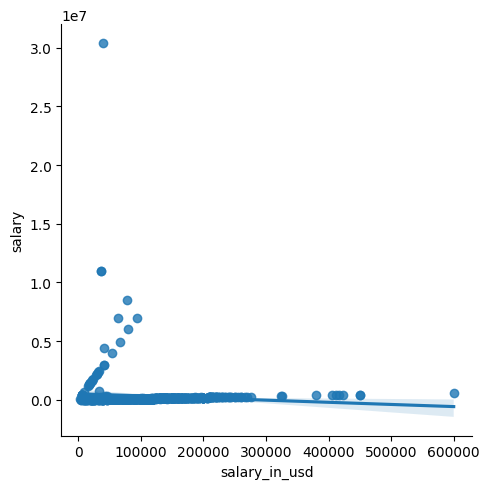

In [141]:
import seaborn as sns
sns.lmplot(x="salary_in_usd",y="salary",data=df)

In [249]:
np.exp(df['salary'])

0       70000.0
1      260000.0
2       85000.0
3       20000.0
4      150000.0
         ...   
602    154000.0
603    126000.0
604    129000.0
605    150000.0
606    200000.0
Name: salary, Length: 607, dtype: float64